# Исследование продаж компьютерных игр

## Перечень основных задач:

1.Выполнить предобработку данных а)заполнить пропуски б)привести название столбцов к нижнему регистру в)ликвидировать дубликаты г)преобразовать типы данных д)обработать аномалии

2.Провести исследовательский анализ данных

3.Составить портрет среднего пользователя в каждом регионе

4.Проверить гипотезы:
а)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
б)Средние пользовательские рейтинги жанров Action и Sports разные.

5.Визуализировать выводы

## Предобработка данных

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
# загружаем данные в переменную data

data = pd.read_csv('/datasets/games.csv')

In [3]:
#общая информация по данным

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В этом разделе мы загрузили данные и получили первичную информацию о них: много пропусков в разделах оценок критиков и оценок пользователей, также есть пропуски в году выпуска игр

### Заменяем названия столбцов (приводим к нижнему регистру);

In [4]:
data.columns = map(str.lower, data.columns)

### Приводим данные к нужным типам

In [5]:
data.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Столбец с годом необходимо преобразовать к Int, float здесь ни к чему, дробных чисел в годах быть не может

In [6]:
data.year_of_release = data.year_of_release.astype('Int64')

In [7]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В столбце с оценкой критиков мы также не видим дробных значений, значит приводим тип данных к Int

In [8]:
data.critic_score = data.critic_score.astype('Int64')

In [9]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как мы видим, в оценкаx пользователей фигурируют дробные и целочисленные значения, а также 'tbd'. Следовательно приводим к Float, но сначала значения 'tbd' переводим в (-7)

In [10]:
data.loc[data['user_score']=='tbd', 'user_score'] = (-7)

In [11]:
data['user_score'] = data['user_score'].astype('float')

Данные в остальных столбцах соответствуют своему типу

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Исследуем и заполняем пропуски

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В названиях игр всего два пропуска. Можно удалить, так как без названия нет смысла анализа. Скорее всего, данный вид пропуска возник из-за халатности либо невнимательности собирающего данные

In [14]:
data = data.dropna(subset = ['name'])

In [15]:
data.platform.isna().sum()

0

In [16]:
data.year_of_release.isna().sum()

269

 Скорее всего, данный вид пропуска возник из-за халатности либо невнимательности собирающего данные. Очень мало пропусков, можно удалить

In [17]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,-7.0,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [18]:
data = data.dropna(subset = ['year_of_release'])

In [19]:
data.shape

(16444, 11)

In [20]:
data.year_of_release.isna().sum()

0

In [21]:
data.genre.isna().sum()

0

In [22]:
data.critic_score.isna().sum()

8461

In [23]:
data.user_score.isna().sum()

6605

Около половины данных в столбцах critic_score и user_score  - пропуски. Заполнять мерами центральной тенденции - не вариант. Так как они серьезно исказят данные. Удалять тоже нельзя. Вряд ли все эти пропуски - это нулевые оценки экспертов. Тогда слишком жесткие эксперты. Значит оставляем пропуски. Возможно, эти пропуски возникли вследствие, того что ни один эксперт или ни один игрок не поставил оценку - такое бывает

In [24]:
data.rating.value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Категориальные данные плюс мы не знаем как они присваиваются, следовательно, оставляем пропуски. Скорее всего, данные пропуски возникли вследствие того, что агентство ESRB не присвоило никакого рейтинга данной игре

ВСЕ ПРОПУСКИ, ГДЕ ЭТО БЫЛО ВОЗМОЖНО, ЗАПОЛНЕНЫ!!!

In [25]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Обработка дубликатов

In [27]:
data.duplicated(subset=('name')).sum()

5018

In [28]:
data.loc[data.duplicated(subset=('name'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,<NA>,-7.0,T,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


Дубликаты в названии это вполне нормально, так как одни и те же игры выходят на разных платформах

In [29]:
data.loc[data.duplicated(['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E,0.01


Их всего три, надо взглянуть конкретнее

In [30]:
data.loc[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E,0.27


Как мы видим, на примере одной игры, хоть название игры и платформа одна и та же, однако год выхода разный, следовательно, это разные игры (может с обновлениями), то есть не дубликаты

In [31]:
data.loc[data.duplicated(['name','platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


Но из этих трех, нашелся один полный дубликат. Вот его я бы удалил

In [32]:
data=data.loc[data.duplicated(['name','platform', 'year_of_release'])==False]

In [33]:
data.shape

(16443, 12)

На этом этапе мы обработали данные, а именно: 
1) обработали пропуски в данных, там где это было безвредно для дальнейшего анализа

2) перевели данные в более удобный для анализа формат

3) создали столбец с суммой продаж во всех регионах

4) удалили 1 дубликат

## Исследовательский анализ

In [34]:
#формируем переменную, содержащую года и кол-во, выпущенных в этот год игр

year_count_of_games = data.loc[data.duplicated(subset=(['name','year_of_release']))==False].\
    pivot_table(index='year_of_release', values='name', aggfunc='count')

In [35]:
# Переименовываем столбец name для построения красивого графика

year_count_of_games = year_count_of_games.rename(columns = {'name': 'Количество игр, вышедших в этот год'})

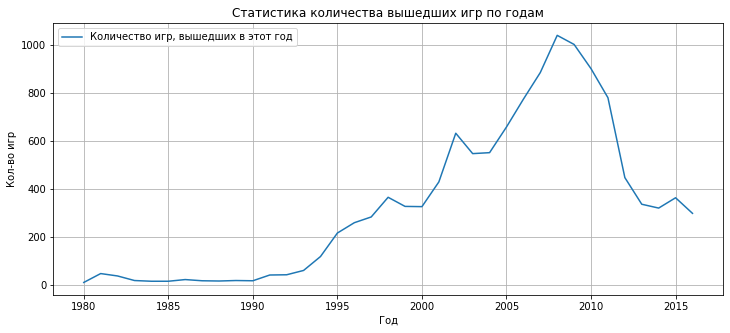

In [36]:
#строим график 

year_count_of_games.plot(grid=True, figsize=(12,5));
plt.ylabel('Кол-во игр');
plt.xlabel('Год');
plt.title('Статистика количества вышедших игр по годам');

Заметен постепенный рост выпуска игр с 1995 по 2007/2008. Период до 1990 года не особо важен (т.к. игры, выпущенные в этот период, абсолютно не востребованы современным рынком, а также их крайне мало). С 2008 наблюдается устойчивое падение продаж

Полагаю, что рост до 2008 года рынка игр связан с тем, что консоли/платформы стали доступными для среднестатичстического человека и в играх появилась 3D графика и многое другое. Спад с 2008 года возможно связан с мировым финансовым кризисом 2007 - 2008 года.

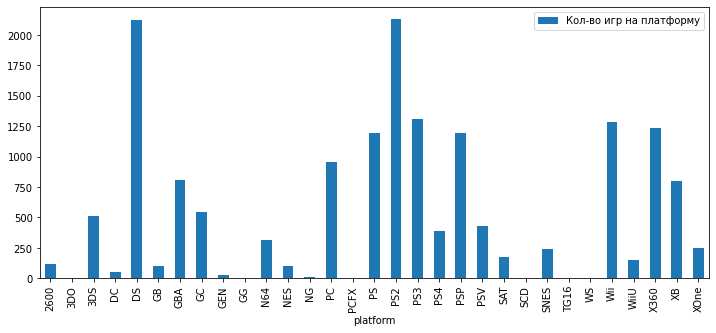

In [37]:
data.groupby('platform')['platform'].count().plot(kind='bar', figsize=(12,5), label = 'Кол-во игр на платформу');
plt.legend();

Выберем платформы с самыми наибольшими продажами игр

In [38]:
data.groupby('platform')['platform'].count().sort_values(ascending=False).head(10)

platform
PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: platform, dtype: int64

In [39]:
data_top_10 = data.groupby('platform')['platform'].count().sort_values(ascending=False).head(10)

In [40]:
data_top_10.index.to_list()[:5]

['PS2', 'DS', 'PS3', 'Wii', 'X360']

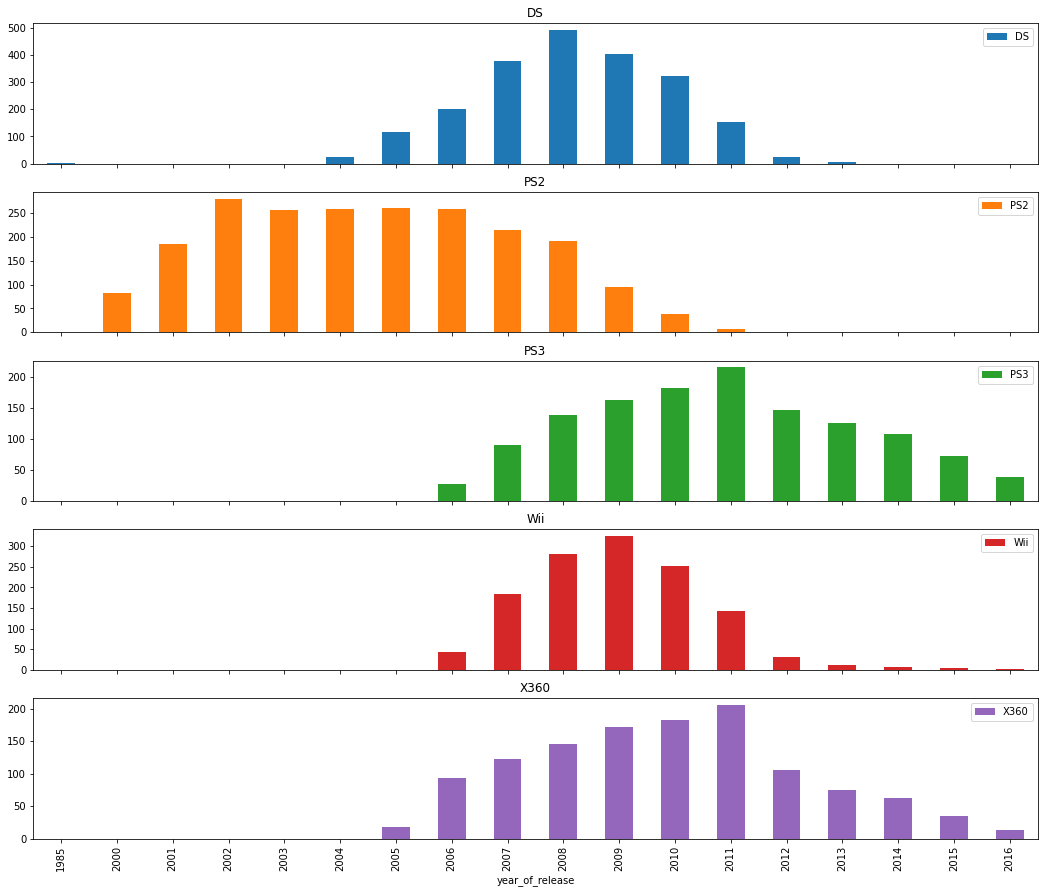

In [41]:
data.loc[data['platform'].isin(data_top_10.index.to_list()[:5])].pivot_table(index='year_of_release', \
        columns='platform', values='name', aggfunc='count').plot(kind='bar', subplots = True,figsize=(18,15));

По графикам видим, что примерный период взлета и падения популярности платформ - 6-10 лет. Именно за этот характерный срок появляются новые и исчезают старые платформы

Актуальный период - период, который поможет сделать прогноз продаж игр на 2017ый год. Для этого он должен обладать следующими характеристиками: 1)в данный период должны преобладать игры на платформы, которые еще не устарели и будут (скорее всего) актуальны на 2017ый; 2)данный период должен характеризоваться линейностью тенденции продаж игр (потому что тут мы не будем строить нелинейные регрессии).  3)нужно взять во внимание динамичность развития игровой индустрии. Согласно всем вышеупомянутым факторам, актуальный период можно определить как период с 2013 по 2016, так как платформы за этот период еще окончательно не устарели (согласно нашим наблюдениям о цикле роста-упадка платформы), и данный период характеризуется постепенным снижением продаж видеоигр (то есть определенной однородностью динамики).

In [42]:
data_for_predict = data.loc[(2013<=data['year_of_release'])]

In [43]:
data_for_predict['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

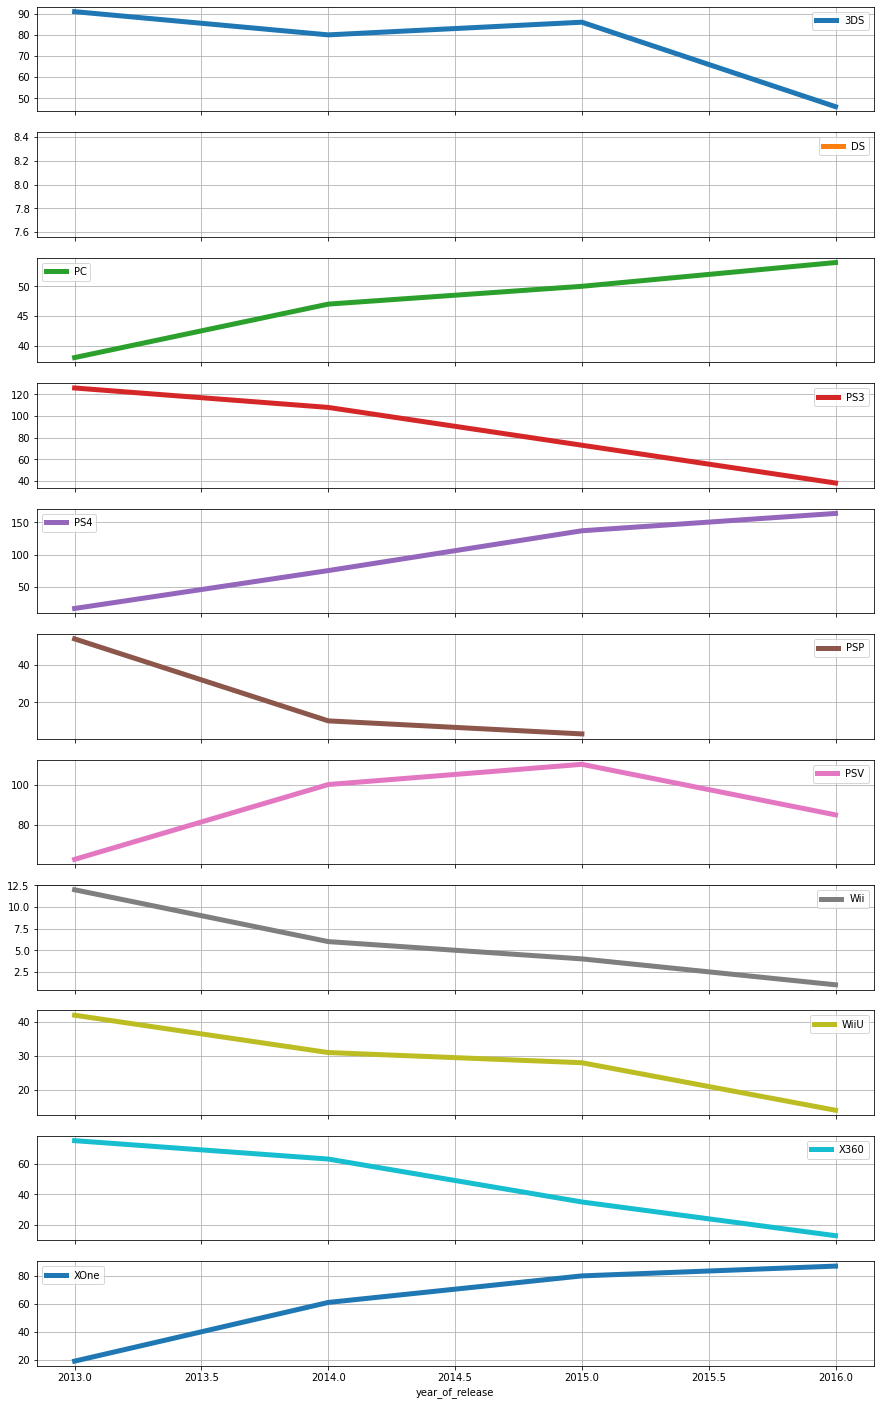

In [44]:
#строим графики спроса игр на различные консоли за последние 3 года
data_for_predict.pivot_table(index='year_of_release', columns='platform', values='name',\
         aggfunc='count').plot(grid = True, subplots = True, linewidth= 5, figsize=(15,25));

"Умершие" платформы: PSP, DS

По графику видим, что некоторые платформы показывают устойчивое падение, на некоторые из них игры уже почти не покупают: 3DS, Wii, X360, WiiU, PS3

Другие же показывают устойчивый рост: PC, PS4, XOne. (Это и есть прибыльные платформы)

С PSV неодназначная ситуация: с одной стороны есть тенденция к падению, но эта тенденция - результат лишь последнего года, платформа до сих пор более-менее популярна. Тем не менее, больших надежд на нее возлагать не стоит

Не вижу смысла, анализировать платформы из первой группы.

Создадим группу актуальных платформ

In [45]:
actual_platforms = ('PC', 'PS4', 'XOne', 'PSV', '3DS', 'Wii', 'X360', 'WiiU', 'PS3')

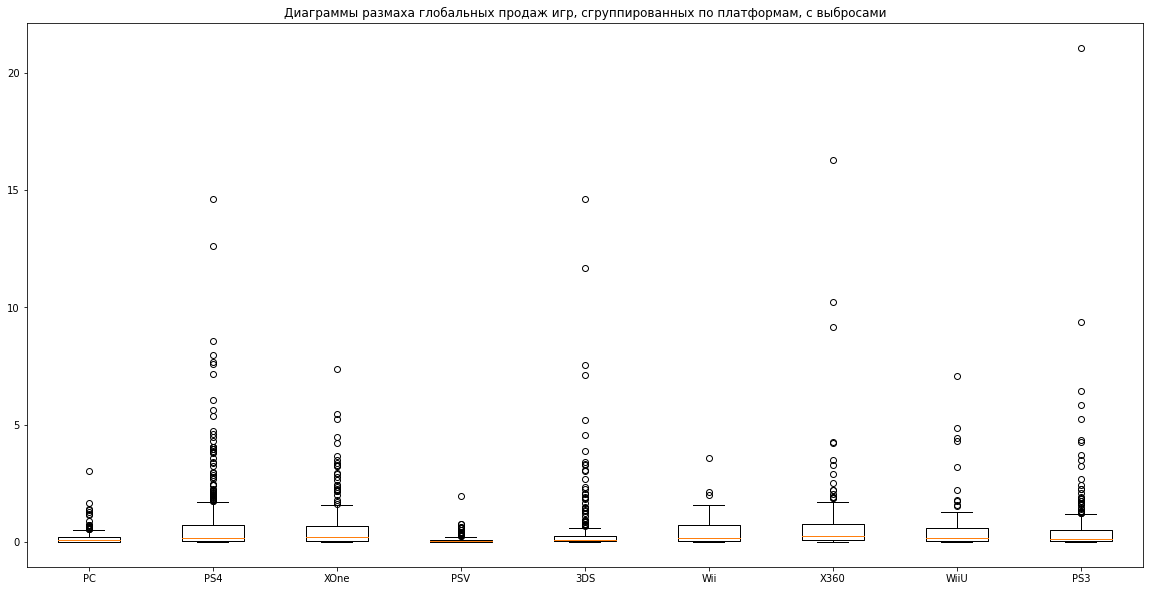

In [46]:
#Здесь мы строим графики с усами в первом варианте, с учетом выбросов

list_boxes = []
for i in actual_platforms:
    list_boxes.append(data_for_predict.loc[data_for_predict['platform']==i, 'all_sales'])
plt.figure(figsize=(20,10))
plt.boxplot(list_boxes, labels=('PC', 'PS4', 'XOne', 'PSV', '3DS', 'Wii', 'X360', 'WiiU', 'PS3'));
plt.title('Диаграммы размаха глобальных продаж игр, сгруппированных по платформам, c выбросами');

Мы видим, что продажи еще крайне скромные в своем большинстве. Тем не менее отдельные игры приносят серьезный доход. Так мы получаем крайне неравномерные распределения с огромными хвостами.

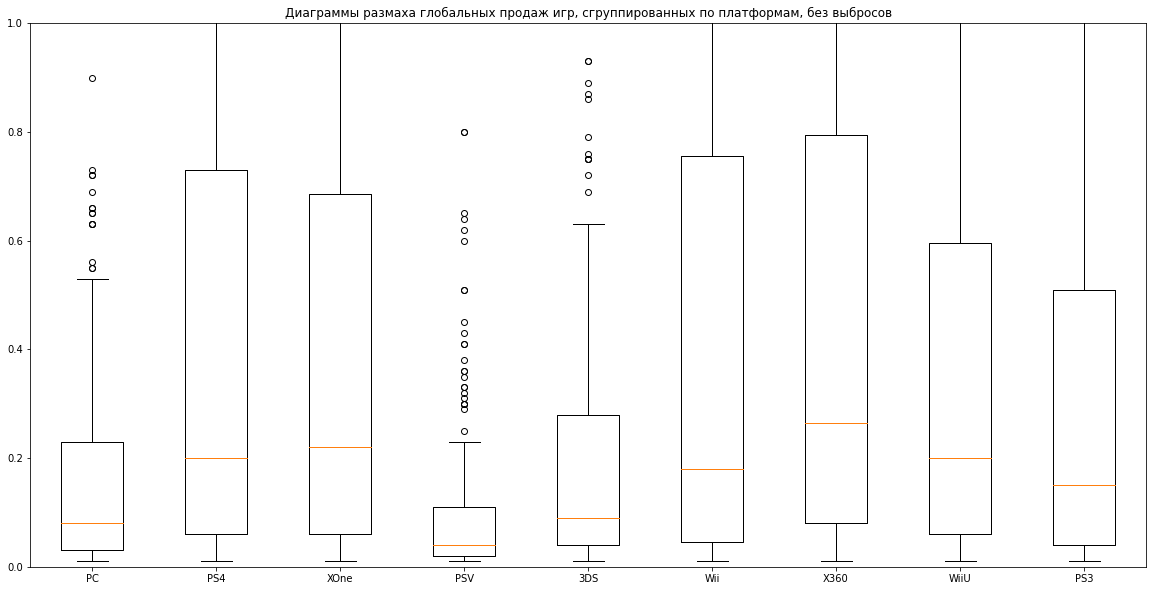

In [47]:
#Здесь мы строим графики с усами во втором варианте, срезав выбросы

list_boxes2 = []
for i in actual_platforms:
    list_boxes2.append(data_for_predict.loc[data_for_predict['platform']==i, 'all_sales'])
plt.figure(figsize=(20,10))
plt.boxplot(list_boxes2, labels=('PC', 'PS4', 'XOne', 'PSV', '3DS', 'Wii', 'X360', 'WiiU', 'PS3'));
plt.ylim((0,1));
plt.title('Диаграммы размаха глобальных продаж игр, сгруппированных по платформам, без выбросов');

Данный срез позволяет нам проанализировать более подробно данные до 75% квартиля. Мы видим, на PSV и PC выходят относительно дешевые игры. Наиболее дорогие игры выходят на X360, Wii, PS4, XOne (из них PS4 и XOne входят в группу перспективных)

ПРОАНАЛИЗИРУЕМ ВЛИЯНИЕ ОТЗЫВОВ НА ПРОДАВАЕМОСТЬ ИГРЫ НА ПРИМЕРЕ ПОПУЛЯРНОЙ ПЛАТФОРМЫ PS4

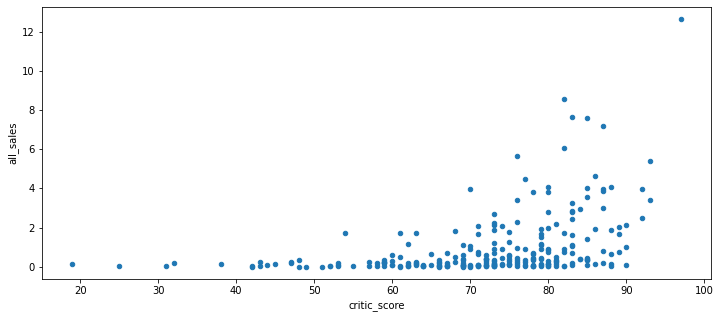

In [48]:
#Строим график зависимости продаж от оценок критиков

data_for_predict.loc[(data_for_predict['platform']=='PS4')].sort_values(by='critic_score').\
    plot('critic_score','all_sales', kind='scatter', figsize=(12,5));

In [49]:
#Считаем корреляцию

data_for_predict.loc[(data_for_predict['platform']=='PS4'), ['critic_score', 'all_sales']].corr()

,critic_score,all_sales
critic_score,1.000000,0.406568
all_sales,0.406568,1.000000


Имеется слабая корреляция. График свидетельствует о том, что хорошая оценкая критиков увеличивает вероятность успешных продаж игры. Вердикт: положительная взаимосвязь определенно есть, но слабая.

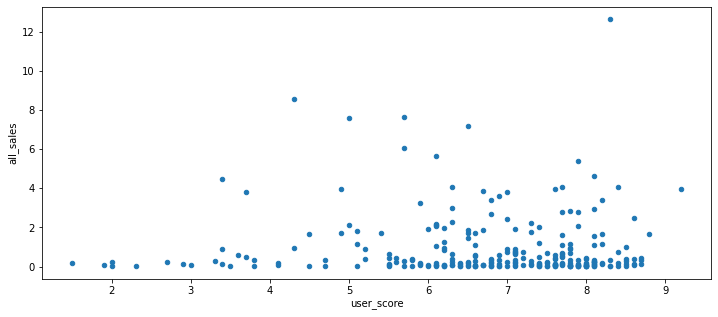

In [50]:
data_for_predict.loc[(data_for_predict['platform']=='PS4')&(data_for_predict['user_score']!=(-7.0))].\
    sort_values(by='user_score').plot('user_score','all_sales', kind='scatter',figsize=(12,5));

In [51]:
data_for_predict.loc[(data_for_predict['platform']=='PS4')&(data_for_predict['user_score']!=(-7.0)),['user_score', 'all_sales']].corr()

,user_score,all_sales
user_score,1.000000,-0.031957
all_sales,-0.031957,1.000000


Корреляция практически отсутствует, по графику тоже не наблюдается четкой взаимосвязи между продажами и оценкой потребителей.

Взаимосвязь оценок критиков и объема продаж для всех платформ:

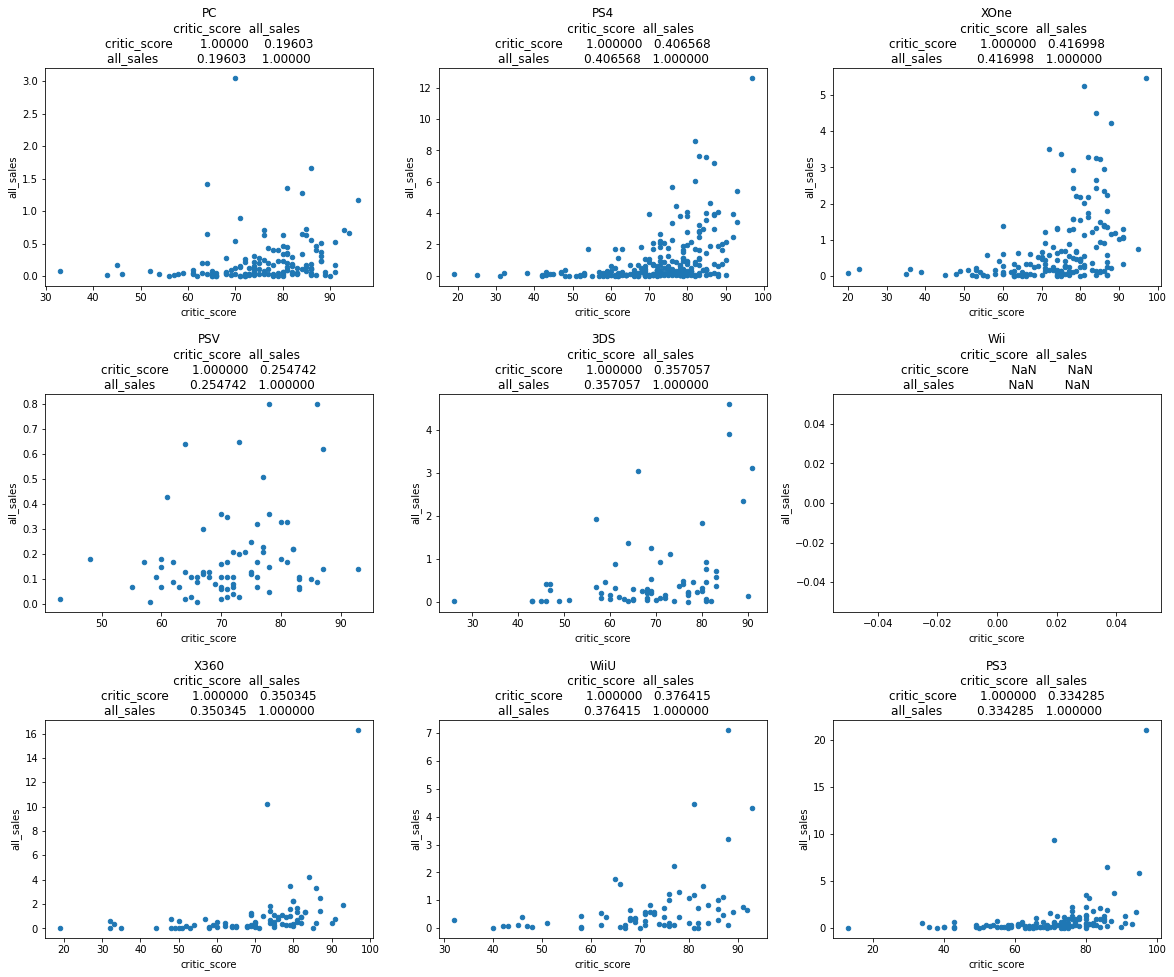

In [52]:
#Данная ячейка отвечает за формирование графиков зависимости оценок критиков и объема продаж для всех платформ
#и расчета коэффициентов корреляций, расположенных над ними

plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.5)
n=1
for i in actual_platforms:
    ax=plt.subplot(3,3,n)
    #строим график зависимости оценок пользователей и продаж
    
    data_for_predict.loc[(data_for_predict['platform']==i)&(data_for_predict['critic_score'].isna()==False)].\
    sort_values(by='critic_score').plot('critic_score','all_sales', kind='scatter', ax=ax);
    #высчитываем корреляцию оценок критиков и продаж и располагаем его в оглавление каждого графика
    
    plt.title(i + '\n' + str(data_for_predict.loc[(data_for_predict['platform']==i)&\
        (data_for_predict['critic_score'].isna()==False), ['critic_score', 'all_sales']].corr()))
    n+=1

Почти на всех платформах, кроме PSV, наблюдается слабая корреляции (от 0.3 до 0.4). Если приглядеться к графикам, то заметим, что при более высоких оценках пользователей, разброс значений больше. То есть взаимосвязь, на самом деле есть (кроме PSV), но она не совсем линейна. А заключается она в том, что при увеличение оценки - растет уровень гетероскедастичности. 

Взаимосвязь оценок потребителей и объема продаж для всех платформ:

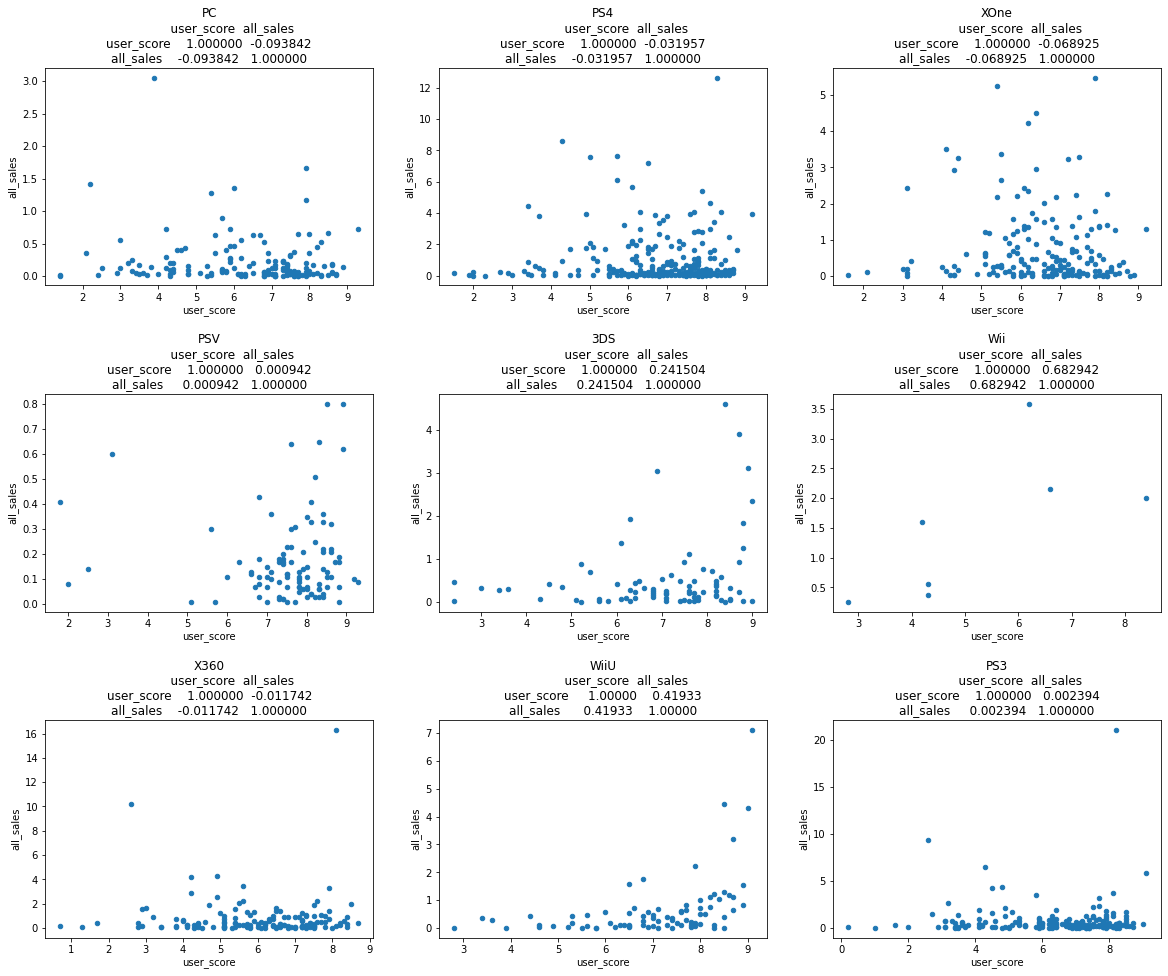

In [53]:
#Данная ячейка отвечает за формирование графиков зависимости оценок потребителей и объема продаж для всех платформ
#и расчета коэффициентов корреляций, расположенных над ними

plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.5)
n=1
for i in actual_platforms:
    ax=plt.subplot(3,3,n)
    #строим график зависимости оценок пользователей и продаж
    
    data_for_predict.loc[(data_for_predict['platform']==i)&(data_for_predict['user_score']!=(-7.0))].\
        sort_values(by='user_score').plot('user_score','all_sales', kind='scatter', ax=ax);
    #высчитываем корреляцию оценок пользователей и продаж и располагаем его в оглавление каждого графика
    
    plt.title(i + '\n' + str(data_for_predict.loc[(data_for_predict['platform']==i)&\
        (data_for_predict['user_score']!=(-7.0)),['user_score', 'all_sales']].corr()))
    n+=1

Видно, что пользователи реже ставят оценки ниже 5. Возможно, это связано с психологией и/или этикой, возможно, просто настолько плохих игр не так много. Слабая корреляция наблюдается только на платформе WiiU, что связано опять же с эффектом роста гетероскедастичности, что, в свою очередь, может быть следствием роста числа наблюдений на этом промежутке (чем больше наблюдений, тем больше выявляется разброс). В остальном предварительный вывод таков: Оценки пользователей и объем продаж игры не взаимосвязаны ни на каких платформах.

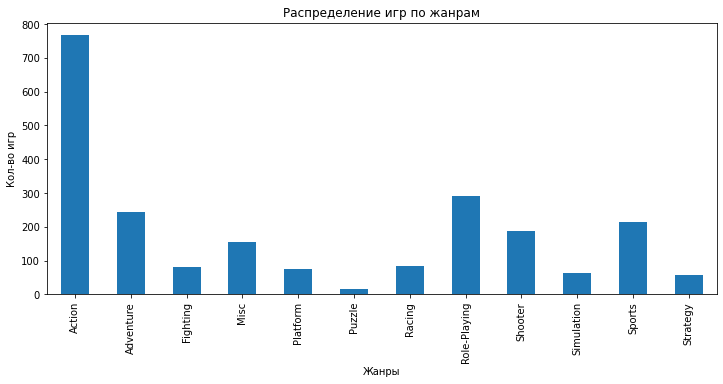

In [54]:
#строим барплот для определения в каком жанре выходит больше всего игр

data_for_predict.groupby('genre')['genre'].count().plot(kind='bar', figsize=(12,5));
plt.title('Распределение игр по жанрам');
plt.xlabel('Жанры')
plt.ylabel('Кол-во игр');

Самый популярный жанр - боевики. Все другие значительно отстают. Более-менее популярны - приключенческие игры, misc, спортивные и ролевые. Все остальные малопопулярны.

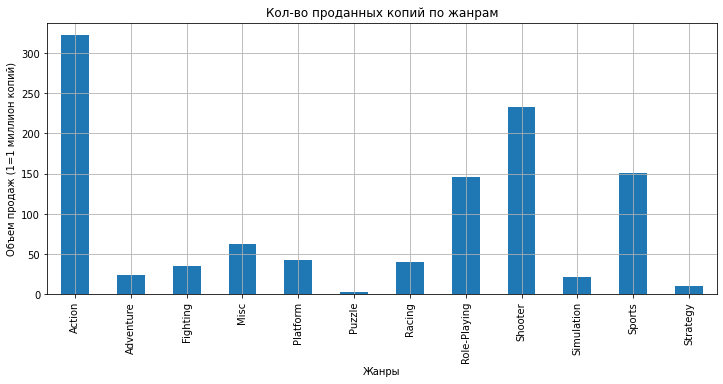

In [55]:
data_for_predict.groupby('genre')['all_sales'].sum().plot(kind='bar', figsize=(12,5), grid=True);
plt.title('Кол-во проданных копий по жанрам');
plt.xlabel('Жанры')
plt.ylabel('Объем продаж (1=1 миллион копий)');

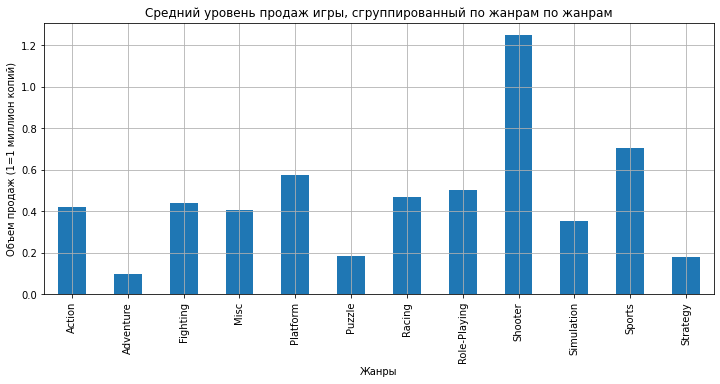

In [56]:
#Строим барплот для выяснения какой жанр наиболее прибыльный 
    #(как распродается в среднем одна игра того или иного жанра)
data_for_predict.groupby('genre')['all_sales'].mean().plot(kind='bar', figsize=(12,5), grid=True);
plt.title('Средний уровень продаж игры, сгруппированный по жанрам по жанрам');
plt.xlabel('Жанры')
plt.ylabel('Объем продаж (1=1 миллион копий)');

Топ-5 самых прибыльных жанров:
1. Shooter
2. Sports
3. Platform
4. Role-Playing
5. Racing

Так не так много игр составляют шутеры, но по кол-ву проданных копий на одну игру они превосходят все остальные жанры

Очень много игр выпускают в жанре Action, тем не менее они не особо прибыльны

Самые низкие продажи у игр жанра Adventure

## Составление портрета пользователя каждого региона

Популярность различных платформ в разных регионах:

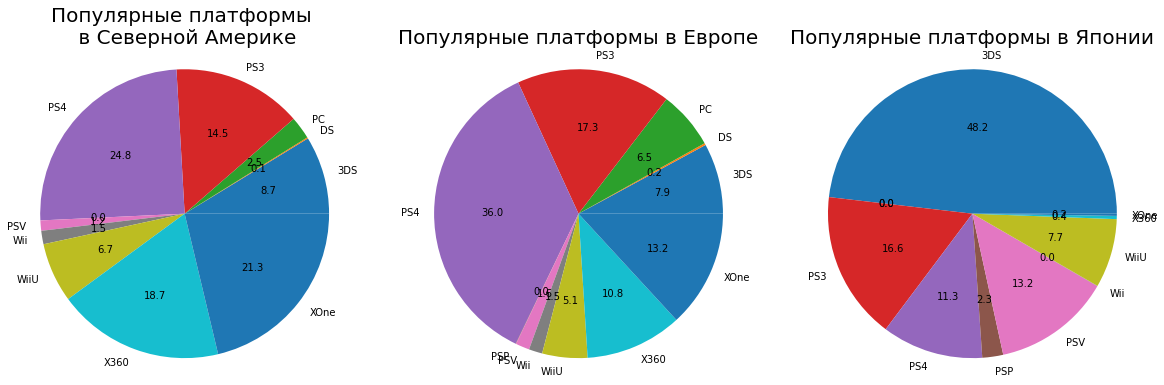

In [57]:
#здесь мы строим круговые диаграммы для определения самых популярных платформ в разных регионах

plt.figure(figsize=(20,16))
n=1
for i,y in {'na_sales': 'Популярные платформы \n в Северной Америке', 'eu_sales':'Популярные платформы в Европе',\
            'jp_sales':'Популярные платформы в Японии'}.items():
    ax=plt.subplot(1,3,n)
    data_for_predict.groupby('platform')[i].sum().plot(kind='pie', radius=1.1, autopct = '%.1f', ax=ax);
    plt.title(y, fontsize=20)
    plt.ylabel('')
    ax.tick_params(axis='both', labelsize=20)
    n+=1

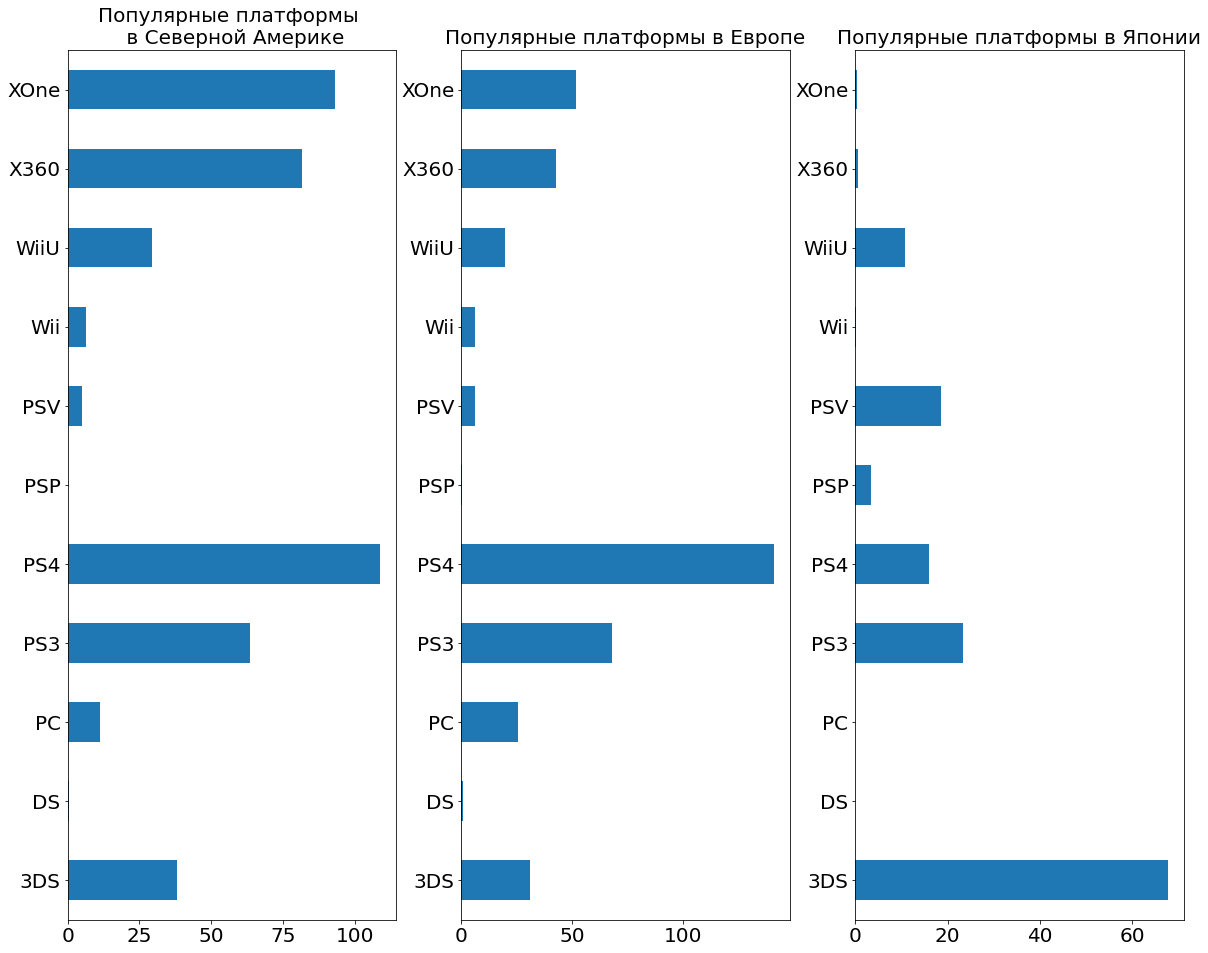

In [58]:
plt.figure(figsize=(20,16))
n=1
for i,y in {'na_sales': 'Популярные платформы \n в Северной Америке', 'eu_sales':'Популярные платформы в Европе',\
            'jp_sales':'Популярные платформы в Японии'}.items():
    ax=plt.subplot(1,3,n)
    data_for_predict.groupby('platform')[i].sum().plot(kind='barh', ax=ax);
    plt.title(y, fontsize=20)
    plt.ylabel('')
    ax.tick_params(axis='both', labelsize=20)
    n+=1

ТОП-5 платформ по объему проданных для них игр в Северной Америке:
1. PS4 (24.8%)
2. XOne (21.3%)
3. X360 (18.7%)
4. PS3 (14.5%)
5. 3DS (8.7%)

ТОП-5 платформ по объему проданных для них игр в Европе:
1. PS4(36.0%)
2. PS3 (17.3%)
3. XOne (13.2%)
4. X360(10.8%)
5. 3DS (7.9%)


ТОП-5 платформ по объему проданных для них игр в Японии:
1. 3DS(48.2%)
2. PS3(16.6%)
3. PSV(13.2%)
4. PS4(11.3%)
5. WiiU(7.7%)

В Северной Америке и Европе лидируют такие платформы как PS4 и XOne. Их Топ-5 на 100% состоят из одних и тех же платформы, хоть игры на эти платформы занимают различные доли на рынке. Японский рынок игр серьезно отличается. Наибольшей популярностью пользуются игры на 3DS (почти 50%), платформа которая мало используется в Европе и Северной Америке. Также в Японии в ТОП-5 входят PSV, WiiU - это серьезно отличает ее от других регионов Однако тут тоже популярны PS3 и PS4.

Популярность различных жанров в разных регионах:

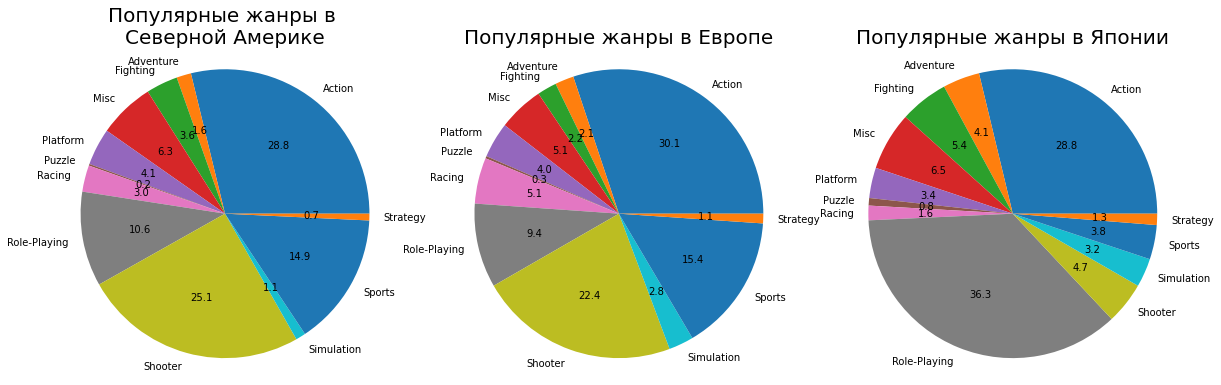

In [59]:
plt.figure(figsize=(20,16))
n=1
for i,y in {'na_sales': 'Популярные жанры в \nСеверной Америке', 'eu_sales':'Популярные жанры в Европе',\
            'jp_sales':'Популярные жанры в Японии'}.items():
    ax=plt.subplot(1,3,n)
    data_for_predict.groupby('genre')[i].sum().plot(kind='pie', radius=1.1, autopct = '%.1f', ax=ax);
    plt.title(y, fontsize=20)
    plt.ylabel('')
    n+=1

ТОП-5 жанров по объему продаж в Северной Америке:
1. Action (28.8% рынка)
2. Shooter (25.1% рынка)
3. Sports (14.9% рынка)
4. Role_Playing (10.6%)
5. Misc(6.3%)

ТОП-5 жанров по объему продаж в Европе:
1. Action (30.1% рынка)
2. Shooter (22.4% рынка)
3. Sports (15.4% рынка)
4. Role_Playing(9.4%)
5. Misc/Racing (5.1% каждая)

ТОП-5 жанров по объему продаж в Японии:
1. Role_Playing(36.3%)
2. Action (28.8%)
3. Misc (6.5%)
4. Fighting (5.4%)
5. Shooter (4.7%)

Состав Топ-5 во всех регионах почти идентичен, однако, мы видим, что пользователи в  Европе и Северной Америке крайне похожи по своим предпочтениям экшн и шутеры занимают большую часть рынка). Япония отличается - наибольшей популярностью в ней пользуются Ролевые игры. Шутеры в Японии вообще не востребованы, а Action уступает только Ролевым играм.

In [60]:
data_for_predict['rating'].value_counts(dropna=False)

NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [61]:
data_for_predict['rating'].value_counts(dropna=False)

NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

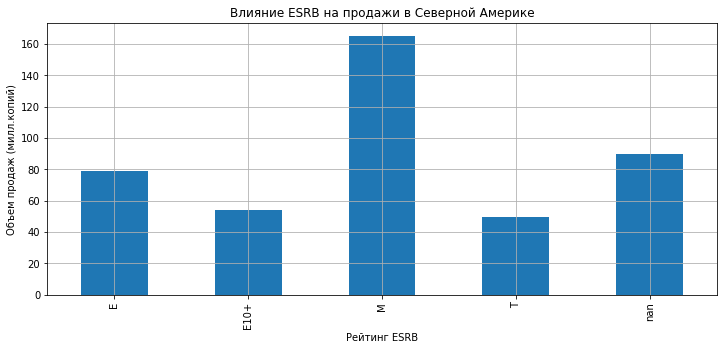

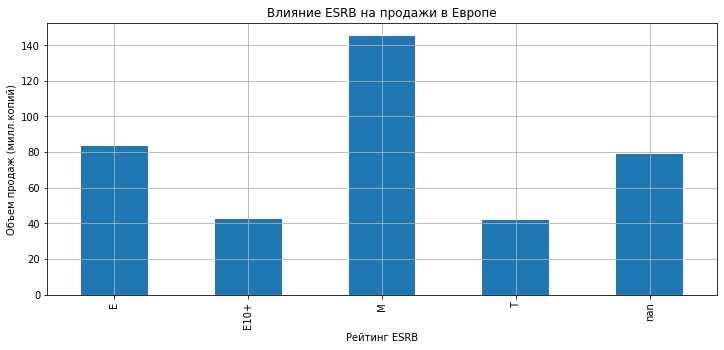

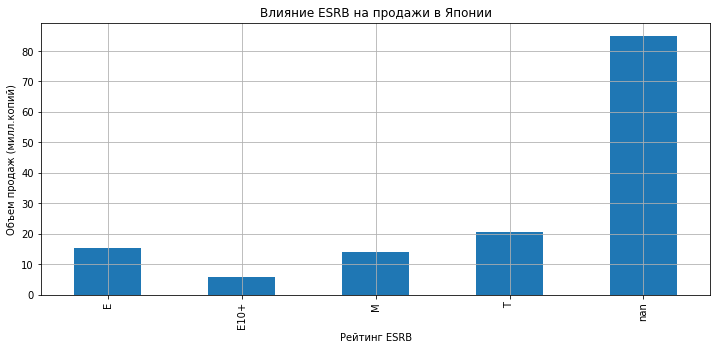

In [62]:
for i,y in {'na_sales': 'Влияние ESRB на продажи в Северной Америке', 'eu_sales':'Влияние ESRB на продажи в Европе', 'jp_sales':'Влияние ESRB на продажи в Японии'}\
    .items():
    data_for_predict.groupby('rating', dropna=False)[i].sum().plot(kind='bar', figsize=(12,5), grid=True)
    plt.title(y)
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Объем продаж (милл.копий)')
    plt.show()

Опять замечаем схожесть влияния данного рейтинга в Европе и Северной Америке. Пользователи в этих регионах покупают в основном игры с категорией (M), то есть Mature. Скорее это связано с тем, что предпочтительный жанр в этих регионах - боевики и экшен (большинство из которых 18+). Так как в Японии другие жанровые предпочтения (ролевые), то преобладают и другие категории ESRB, такие как E(для всех) и T(для подростков).

Вывод: Портреты пользователей Европы и Северной Америки похожи. Средний Японский пользователь от них серьезно отличается как по жанровым, так и по предпочтениям платформ.

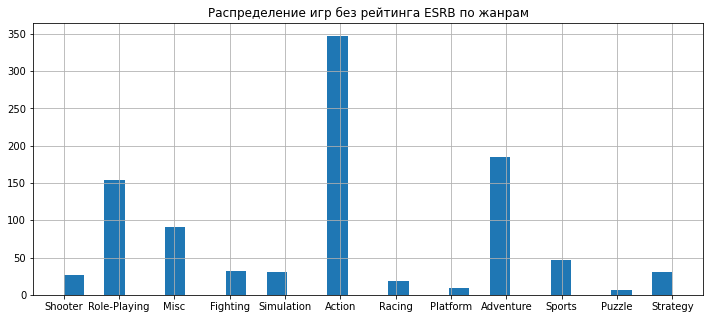

In [63]:
#распределение игр без рейтинга ESRB по жанрам

data_for_predict.loc[data_for_predict['rating'].isna(),'genre'].hist(bins=30, figsize=(12,5));
plt.title('Распределение игр без рейтинга ESRB по жанрам');

Эта гистограмма дает четко понять, что шутеров без рейтинга ESRB очень мало. Как раз этот жанр пользуется огромной популярностью в Европе и Америке, но маловостребован в Японии. Обратная ситуация с Action и Role_Playing (многие из этих игр без рейтинга) - самыми популярными жанрами в Японии. Именно из-за различия в жанровых предпочтениях, появляются различия и в рейтинговых распределениях по регионам.

## Проверка гипотез
а) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

б) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пусть alpha будет 0.05
В обоих случаях мы выдвигаем гипотезу о равенстве средних двух независимых генеральных совокупностей, поэтому применяем двусторонний т-тест scipy.stats.ttest_ind (array1, array2, equal_var). Чтобы понять, как настроить парметр equal_var, проверим дисперсию двух выборов плюс  проверим их размерность:

In [64]:
#cоздаем переменную, содержащую все рейтинги пользователей по платформе XOne

stat_for_xone = data_for_predict.loc[(data_for_predict['platform']=='XOne') & (data_for_predict['user_score']!=(-7))\
                                     & (data_for_predict['user_score'].isna()==False), 'user_score']

In [65]:
#cоздаем переменную, содержащую все рейтинги пользователей по платформе PC

stat_for_pc = data_for_predict.loc[(data_for_predict['platform']=='PC') & (data_for_predict['user_score']!=(-7))\
                                     & (data_for_predict['user_score'].isna()==False), 'user_score']

In [66]:
stat_for_xone.count()

182

In [67]:
stat_for_xone.var()

1.9069968429360695

In [68]:
stat_for_pc.count()

155

In [69]:
stat_for_pc.var()

3.035892752408882

Выборки разных размеров, и дисперсии у них тоже отличаются, поэтому equal_var = False

Формулирование гипотез:

Нулевая гипотеза: Средние пользовательских рейтингов платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Средние пользовательских рейтингов платформ Xbox One и PC не равны


In [70]:
#Проводим т-тест по 0.05 p-value

alpha=0.05
results=st.ttest_ind (stat_for_xone, stat_for_pc, equal_var=False)
print(results.pvalue)
if results.pvalue<alpha:   
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

0.14759594013430463
Отвергнуть нулевую гипотезу не получилось


Такую же процедуру проделываем со второй гипотезой о равенстве средних рейтингов жанров (Action и Sports)

In [71]:
#cоздаем переменную, содержащую все рейтинги пользователей по жанру Action

stat_for_action = data_for_predict.loc[(data_for_predict['genre']=='Action') & \
        (data_for_predict['user_score']!=(-7))& (data_for_predict['user_score'].isna()==False), 'user_score']

In [72]:
#cоздаем переменную, содержащую все рейтинги пользователей по жанру Sports

stat_for_sports = data_for_predict.loc[(data_for_predict['genre']=='Sports') & \
        (data_for_predict['user_score']!=(-7))& (data_for_predict['user_score'].isna()==False), 'user_score']

In [73]:
stat_for_action.count()

389

In [74]:
stat_for_action.var()

1.7693609042482705

In [75]:
stat_for_sports.count()

160

In [76]:
stat_for_sports.var()

3.180612814465409

Выборки разных размеров, и дисперсии у них тоже отличаются, поэтому equal_var = False

Формулирование гипотез:

Нулевая гипотеза: Средние пользовательских рейтингов жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательских рейтингов жанров Action и Sports не равны.

In [77]:
alpha=0.05
results=st.ttest_ind (stat_for_action, stat_for_sports, equal_var=False)
print(results.pvalue)
if results.pvalue<alpha:   
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


## Общий вывод:

Была проведена обработка данных, вследствие которой были приведены к нижнему регистру названия столбцов, ликвидированы пропуски там, где это возможно. Удалено крайне мало данных.
Далее по пунктам:

1) Аналитически был определен актуальный период (с 2013 по 2016 гг.), на основе которого можно строить прогнозы на будущий 2017ый год.

2) Определен приблизительный цикл роста-падения популярности платформ (6-10 лет)

3) Рынок видеоигр с 2008 года постепенно падает

4) Выделены потенциально прибыльные и в будущем актуальные платформы (PC, PS4, XOne), на которые бизнесу следует сделать ставку, а также платформы, которые уже либо абсолютно не актуальны (PSP, DS), либо показывают спад (3DS, Wii, X360, WiiU, PS3)

5) Обозначены платформы, предназначенные в среднем для более продаваемых игр (X360, Wii, PS4, XOne) (с помощью boxplots)

6) Не выявлено взаимосвязи между оценкой пользователя и объемом продаж игр

7) Выявлена взаимосвязь оценок критиков и объема продаж игр, скорее всего, она нелинейна, и заключается в росте уровня гетероскедастичности (разброса данных)

8) Определены самые прибыльные жанры  (Shooter, Sports, Platform, Role-Playing, Racing)

9) Рейтинг ESRB сам по себе никак не влияет на покупаемость игр, а распределение более популярных и менее популярных игр по категориям этого рейтинга является следствием региональных предпочтений покупателей (Американцы и европейцы покупают преимущественно игры 18+(M), так как они предпочитают шутеры,  а японцы покупают игры без возрастных ограничений и категории, так как вместо шутеров предпочитают Action и Role_Playing)

10) Важно подчеркнуть, что обнаружены значительные различия между средним японским пользователем и (средними европейским и североамериканским пользователями). Японские пользователи в большинстве своем играют на платформе 3DS и PS3 в игры жанра Role_Playing и Action. Американские и европейские пользователи предпочитают шутеры и экшн на платформах XOne и PS4.


Ориентироваться сразу в два направления будет затруднительно, так как предпочтения в платформах и жанрах существенно отличаются. Однако возможно, если сконцентрироваться на продаже игр жанра Action на платформу PS3. В ином случае придется выбрать один из двух сценариев: японский(платформа 3DS/ жанр Role_Playing)(не рекомендуется так как японский рынок не такой большой+сегодняшние популярные платформы в Японии не будут столь популярны спустя 2 года), европо-американский (платформа PS4/ жанр Action)(данная платформа хоть еще не на самой вершине, но у нее большие перспективы, в отличие от X360 и PS3, которые постепенно уходят в прошлое) (данный сценарий рекомендуется). 



### Рекомендации:
1) Следует в 2017 году для пользователей из Японии акцент рекламной кампании сделать на игры жанра Role_Playing и Action, выпускаемые на платформе 3DS (несмотря на то, что она постепенно теряет популярность (игры на нее в последние три года занимали почти половину рынка, то есть ей пользуется большинство японцев и в 2017, скорее всего еще будут пользоваться)

2) Для жителей Северной Америки и Европы рекламную кампанию следует акцентировать на шутерах (так как они самые доходные), выпущенных на платформы PS4 и XOne (эти платформы в следующем годы, скорее всего, станут еще более популярными, а также игры на них обычно более продаваемые)

3) Не стоит тратить ресурсы рекламной кампании в будущем 2017 году на игры, предназначенные для платформ PSP, DS, WiiU, Wii

4) Также не стоит тратить ресурсы рекламной кампании в будущем 2017 году на игры в жанрах Adventure, Platform, Simulation, Puzzle, Strategy, Fighting
